### Data analysis for "Low frequency vibrations and highly disordered molecules:  The importance of entropy for phase stability in the hybrid perovskite [CH$_3$NH$_3$]PbBr$_3$, revealed by inelastic neutron scattering and *ab initio* lattice dynamics"

This notebook takes the raw data from a set of phonon calculations, performed with `VASP` and `Phonopy` and processes them to provide an analysis of the relative stability of three phases of [CH$_3$NH$_3$]PbBr$_3$.

#### Set up Python environment

* Import necessary libraries.
* Set defaults for nice looking plots.

In [1]:
%matplotlib inline
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import ceil
import scipy.constants as const
from matplotlib import cm


textsize = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 22


from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})

#### Construct helper functions

These are the functions that are needed to read in the raw data

In [2]:
def yaml_loader(filepath):
    """Reads in yaml files"""
    with open(filepath,"r") as file_descriptor:
        data = yaml.load(file_descriptor)
    return data

def load_property(dictionary,prop):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(dictionary['thermal_properties'])):
        new_list.append(dictionary['thermal_properties'][i][prop])
    return new_list

def load_frequencies(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['band'][j]['frequency']))
    return new_list

def load_weights(dictionary):
    """Extracts a particular property from the disctionary and returns as a list"""
    new_list = []
    for i in range(len(data['phonon'])):
        for j in range(len(data['phonon'][i]['band'])):
            new_list.append(float(data['phonon'][i]['weight']))
    return new_list

def read_pdos(filename):
    f = open(filename)
    data = f.readlines()
    phonons = []
    for datum in data:
        inp = datum.split()
        inp = [ float(i) for i in inp ]
        phonons.append(inp)
    return np.asarray(phonons)

#### Load up the data

* Note that the temperature ranges in the `yaml` files are 0 - 600 K in steps of 5 K. Hence, we also set up a teperature array to match.

In [4]:
temperatures = np.arange(0,605,5)

MAPB_cubic = yaml_loader('thermal_properties_cubic.yaml')
MAPB_cubic_S = load_property(MAPB_cubic, 'entropy')
MAPB_cubic_S = [i/4 for i in MAPB_cubic_S]

MAPB_ortho = yaml_loader('thermal_properties_ortho.yaml')
MAPB_ortho_S = load_property(MAPB_ortho, 'entropy')
MAPB_ortho_S = [i/4 for i in MAPB_ortho_S]

MAPB_tet = yaml_loader('thermal_properties_tet.yaml')
MAPB_tet_S = load_property(MAPB_tet, 'entropy')
MAPB_tet_S = [i/4 for i in MAPB_tet_S]

#### Plot the vibrational entropy of the three phases

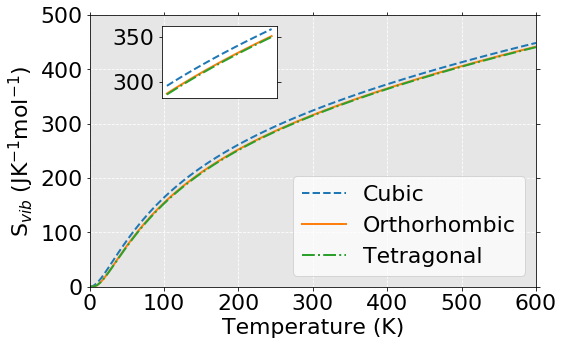

In [12]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(8,5)

line = 2 # Set the linewidth

ax1.plot(temperatures,MAPB_cubic_S,'--',lw=line,label='Cubic')
ax1.plot(temperatures,MAPB_ortho_S,lw=line,label='Orthorhombic')
ax1.plot(temperatures,MAPB_tet_S,'-.',lw=line,label='Tetragonal')


for i in range(2):
    ax1.set_facecolor((0.9,0.9,0.9))
    ax1.grid(True)
    ax1.set_xlim(0,600)
    ax1.set_ylim(0,500)
    ax1.set_ylabel('S$_{vib}$ (JK$^{-1}$mol$^{-1}$)')
    ax1.set_xlabel('Temperature (K)')
    ax1.legend(loc='lower right')
    
# this is an inset axes over the main axes
# range 50:75 is 250 - 370 K

b = plt.axes([.25, .65, .2, .2], facecolor=(1,1,1)) # location of the inset
plt.plot(temperatures[50:75],MAPB_cubic_S[50:75],'--',lw=line)
plt.plot(temperatures[50:75],MAPB_ortho_S[50:75],lw=line)
plt.plot(temperatures[50:75],MAPB_tet_S[50:75],'-.',lw=line)
plt.xticks([])

plt.savefig('Entropies_PP.png')

#### Load in the phonon free energies of each phase

* Note that these are the phonon free energies, they don't include the enthalpy, it is the sum of the vibrational energy and the vibrational entropy.

In [13]:
MAPB_cubic_G = load_property(MAPB_cubic, 'free_energy')
MAPB_cubic_G = [i/4 for i in MAPB_cubic_G]

MAPB_ortho_G = load_property(MAPB_ortho, 'free_energy')
MAPB_ortho_G = [i/4 for i in MAPB_ortho_G]

MAPB_tet_G = load_property(MAPB_tet, 'free_energy')
MAPB_tet_G = [i/4 for i in MAPB_tet_G]

#### Plot the phonon free energies of each phase

* Note that these are the phonon free energies, they don't include the enthalpy, it is the sum of the vibrational energy and the vibrational entropy.

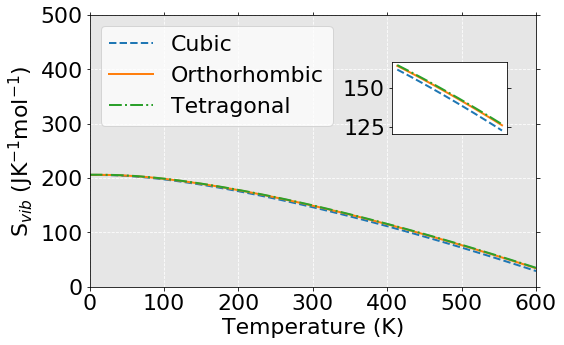

In [23]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(8,5)
line = 2

ax1.plot(temperatures,MAPB_cubic_G,'--',lw=line,label='Cubic')
ax1.plot(temperatures,MAPB_ortho_G,lw=line,label='Orthorhombic')
ax1.plot(temperatures,MAPB_tet_G,'-.',lw=line,label='Tetragonal')


for i in range(2):
    ax1.set_facecolor((0.9,0.9,0.9))
    ax1.grid(True)
    ax1.set_xlim(0,600)
    ax1.set_ylim(0,500)
    ax1.set_xlabel('Temperature (K)')
    ax1.set_ylabel('S$_{vib}$ (JK$^{-1}$mol$^{-1}$)')
    ax1.legend(loc='upper left')
    
# this is an inset axes over the main axes

b = plt.axes([.65, .55, .2, .2], facecolor=(1,1,1))
plt.plot(temperatures[50:75],MAPB_cubic_G[50:75],'--',lw=line)
plt.plot(temperatures[50:75],MAPB_ortho_G[50:75],lw=line)
plt.plot(temperatures[50:75],MAPB_tet_G[50:75],'-.',lw=line)
plt.xticks([])

plt.savefig('PhononFreeEnergy.png')

#### Set the fixed thermodynamic properties

* The enthalipes ($H$) come from DFT calculations
    * Divide by number of stoichiometric units in the unit cell
    * Multiply by 96.49 to convert eV to kJ/mol
* The configurational enthalpies ($S_{config}$) from symmetry arguments
    * These arguments are presented in more detail in the SI of the paper
    * You can play with the numbers to test sensitivity
    * tet_config is the increase with respect to orthorhombic
    * cubic_config is the increase with respect to orthorhombic

In [24]:
MAPB_cubic_H = -215.58720483 / 4 * 96.49
MAPB_tet_H = -215.80676793 / 4 * 96.49
MAPB_ortho_H = -215.86357275 / 4 * 96.49
cubic_config = 8.314 * (np.log(4) + np.log(6))
tet_config = 8.314 * (np.log(4)) 

#### Add the various terms together for each phase
* Convert the entropy (JK$^{-1}$mol$^{-1}$) to energy ( kJmol$^{-1}$)
    * Multiply by temperature and divide by 1000
* Add the phonon free energy to the enthalpy
* Add the configurational terms to the free energy plus enthalpy

In [25]:
config_cubic = [ i * cubic_config / 1000 for i in temperatures ]
config_tet = [ i * tet_config / 1000 for i in temperatures ]

h_cubic = [ i + MAPB_cubic_H for i in MAPB_cubic_G]
h_ortho = [ i + MAPB_ortho_H for i in MAPB_ortho_G]
h_tet = [ i + MAPB_tet_H for i in MAPB_tet_G]

total_cubic = [ b - a for a, b in zip(config_cubic, h_cubic)]
total_tet = [ b - a for a, b in zip(config_tet, h_tet) ]
total_ortho = [ a for a in h_ortho ]

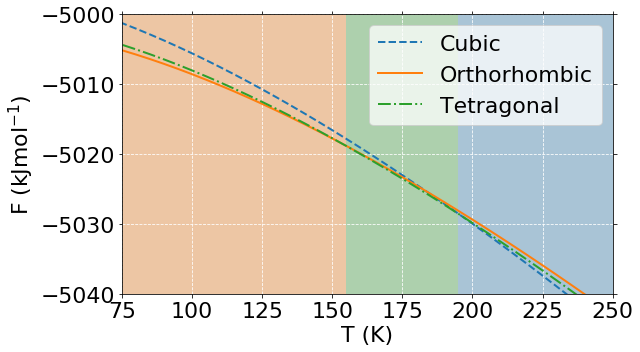

In [26]:
fig, ax1 = plt.subplots(1, 1, sharex=True)
fig.set_size_inches(9,5)

line = 2

# The free energies
ax1.plot(temperatures, total_cubic,'--',lw=line,label='Cubic')
ax1.plot(temperatures, total_ortho,lw=line,label='Orthorhombic')
ax1.plot(temperatures, total_tet,'-.',lw=line,label='Tetragonal')
# Colour in the background to correcpond to the different phases
ax1.fill_between(temperatures[39:],0,-6000,alpha=0.3)
ax1.fill_between(temperatures[:32],0,-6000,alpha=0.3)
ax1.fill_between(temperatures[31:40],0,-6000,alpha=0.3)



ax1.set_xlim(75,250) # The range of the x axis
ax1.set_ylim(-5040,-5000) # The range of the y axis
ax1.set_ylabel('F (kJmol$^{-1}$)')
ax1.set_xlabel('T (K)')
ax1.legend(loc='upper right')
    
plt.tight_layout()

plt.savefig('FreeEnergy.png')